In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds

In [ ]:
data = pd.read_csv('/content/judge-1377884607_tweet_product_company.csv',encoding='ISO-8859-1')
data.head(10)

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
5,@teachntech00 New iPad Apps For #SpeechTherapy...,NaN,No emotion toward brand or product
6,NaN,NaN,No emotion toward brand or product
7,"#SXSW is just starting, #CTIA is around the co...",Android,Positive emotion
8,Beautifully smart and simple idea RT @madebyma...,iPad or iPhone App,Positive emotion
9,Counting down the days to #sxsw plus strong Ca...,Apple,Positive emotion


In [ ]:
data.is_there_an_emotion_directed_at_a_brand_or_product.value_counts()

,count
is_there_an_emotion_directed_at_a_brand_or_product,
No emotion toward brand or product,5389
Positive emotion,2978
Negative emotion,570
I can't tell,156


In [ ]:
data.shape

(9093, 3)

In [ ]:
data.describe()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
count,9092,3291,9093
unique,9065,9,4
top,RT @mention Marissa Mayer: Google Will Connect...,iPad,No emotion toward brand or product
freq,5,946,5389


In [ ]:
# Drop 'emotion_in_tweet_is_directed_at' column as per the instructions

data = data.drop('emotion_in_tweet_is_directed_at',axis=1)

In [ ]:
data.head()

,tweet_text,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Positive emotion


In [ ]:
data.shape

(9093, 2)

In [ ]:
# Check for null values

print('Null values-\n',data.isna().sum(),'\n')
print('data.shape-',data.shape)
data = data.dropna()
# data = data.dropna(subset=['tweet_text', 'is_there_an_emotion_directed_at_a_brand_or_product'])
print('data.shape-',data.shape)

Null values-
 tweet_text                                            1
is_there_an_emotion_directed_at_a_brand_or_product    0
dtype: int64 

data.shape- (9093, 2)
data.shape- (9092, 2)


In [ ]:
import re

In [ ]:
# Text cleaning function

def clean_text(text):
    text = text.lower()  # Convert text to lowercase
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)  # Remove URLs
    text = re.sub(r'@[A-Za-z0-9]+', '', text)  # Remove @mentions
    text = re.sub(r'#', '', text)  # Remove hashtags
    # text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove non-alphabetic characters
    return text

# Clean the tweet text
data['tweet_text'] = data['tweet_text'].apply(clean_text)

data.head()

<ipython-input-160-40a585a5ee49>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['tweet_text'] = data['tweet_text'].apply(clean_text)


,tweet_text,is_there_an_emotion_directed_at_a_brand_or_product
0,. i have a 3g iphone. after 3 hrs tweeting at ...,Negative emotion
1,know about ? awesome ipad/iphone app that yo...,Positive emotion
2,can not wait for ipad 2 also. they should sal...,Positive emotion
3,i hope this year's festival isn't as crashy a...,Negative emotion
4,great stuff on fri sxsw: marissa mayer (googl...,Positive emotion


In [ ]:
# Convert labels to numeric values using LabelEncoder

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['is_there_an_emotion_directed_at_a_brand_or_product'] = label_encoder.fit_transform(data['is_there_an_emotion_directed_at_a_brand_or_product'])
data.head()

<ipython-input-161-eb16930b1507>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['is_there_an_emotion_directed_at_a_brand_or_product'] = label_encoder.fit_transform(data['is_there_an_emotion_directed_at_a_brand_or_product'])


,tweet_text,is_there_an_emotion_directed_at_a_brand_or_product
0,. i have a 3g iphone. after 3 hrs tweeting at ...,1
1,know about ? awesome ipad/iphone app that yo...,3
2,can not wait for ipad 2 also. they should sal...,3
3,i hope this year's festival isn't as crashy a...,1
4,great stuff on fri sxsw: marissa mayer (googl...,3


In [ ]:
# Split the data into training and testing sets

from sklearn.model_selection import train_test_split

X = data['tweet_text']
y = data['is_there_an_emotion_directed_at_a_brand_or_product']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Tokenization and padding

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_words = 10000  # Max number of words to keep in the tokenizer
max_len = 100  # Max length of the sequences

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

In [ ]:
# Build the LSTM model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(4, activation='softmax'))  # 4 classes (positive, negative, neutral, no_idea)

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
# Train the model

history = model.fit(X_train_pad, y_train, epochs=5, batch_size=64, validation_data=(X_test_pad, y_test))

Epoch 1/5
114/114 ━━━━━━━━━━━━━━━━━━━━ 35s 284ms/step - accuracy: 0.5568 - loss: 1.0079 - val_accuracy: 0.5948 - val_loss: 0.8713
Epoch 2/5
114/114 ━━━━━━━━━━━━━━━━━━━━ 31s 269ms/step - accuracy: 0.6688 - loss: 0.7873 - val_accuracy: 0.6366 - val_loss: 0.8370
Epoch 3/5
114/114 ━━━━━━━━━━━━━━━━━━━━ 40s 262ms/step - accuracy: 0.7674 - loss: 0.5933 - val_accuracy: 0.6201 - val_loss: 0.8634
Epoch 4/5
114/114 ━━━━━━━━━━━━━━━━━━━━ 30s 263ms/step - accuracy: 0.8270 - loss: 0.4409 - val_accuracy: 0.6625 - val_loss: 0.9193
Epoch 5/5
114/114 ━━━━━━━━━━━━━━━━━━━━ 41s 265ms/step - accuracy: 0.8574 - loss: 0.3630 - val_accuracy: 0.6443 - val_loss: 1.0264


In [ ]:
# Evaluate the model

loss, accuracy = model.evaluate(X_test_pad, y_test)
print(f'Accuracy: {accuracy * 100:.2f}%')


57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - accuracy: 0.6503 - loss: 1.0180
Accuracy: 64.43%


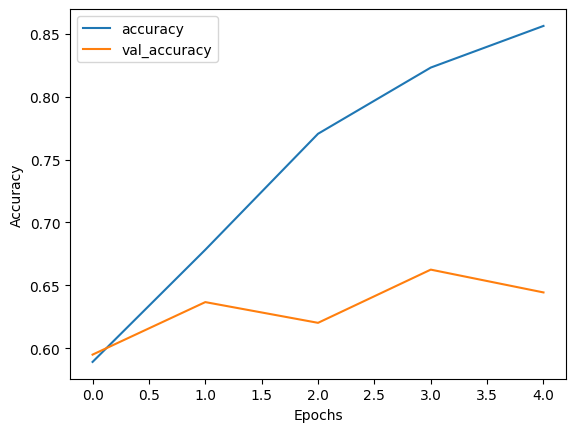

In [ ]:
# Plot the training

import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.show()
